In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

import time
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
datapath1=''
datapath2=''
# datapath1='../data/modified/'
# datapath2='../data/embeddings/'

In [4]:
df=pd.read_hdf(datapath1+'df.h5', 'table')
weight_df=pd.read_hdf(datapath2+'tfidf_weights_df.h5', 'table')

Text(0.5,1,'combined descriptions char length')

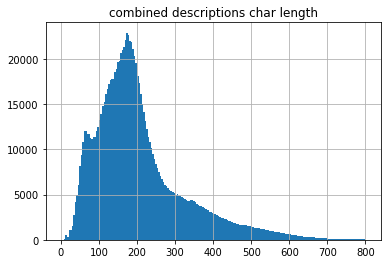

In [5]:
df['comb_desc'].apply(lambda x: len(x)).hist(bins=200, range=[0,800])
plt.title('combined descriptions char length')

In [6]:
desc=df['comb_desc'].apply(lambda x: x.split(' '))

In [7]:
start_time = time.time()
model = Word2Vec(desc,
                    iter=20, #default iter is 5
                    sample=0.02,
                    size=50, #Dimensionality of the feature vectors.
                    window=5, #The maximum distance between the current and predicted word within a sentence.
                    seed=2018,
                    #alpha=0, #The initial learning rate.
                    #min_alpha=0, #Learning rate will linearly drop to min_alpha as training progresses.
                    min_count=5, #Ignores all words with total frequency lower than this.
                    workers=16,)
print("--- %.2f minutes ---" % ((time.time() - start_time)/60))

2018-06-08 00:55:02,779 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-06-08 00:55:02,779 : INFO : collecting all words and their counts
2018-06-08 00:55:02,814 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-08 00:55:02,884 : INFO : PROGRESS: at sentence #10000, processed 360699 words, keeping 11352 word types
2018-06-08 00:55:02,947 : INFO : PROGRESS: at sentence #20000, processed 704465 words, keeping 18927 word types
2018-06-08 00:55:03,013 : INFO : PROGRESS: at sentence #30000, processed 1008064 words, keeping 25702 word types
2018-06-08 00:55:03,073 : INFO : PROGRESS: at sentence #40000, processed 1327190 words, keeping 31145 word types
2018-06-08 00:55:03,137 : INFO : PROGRESS: at sentence #50000, processed 1643757 words, keeping 35043 word types
2018-06-08 00:55:03,202 : INFO : PROGRESS: at sentence #60000, processed 1995978 words, keeping 41523 word types
2018-06-08 00:55:03,263 : INFO : PROGRESS: at s

2018-06-08 00:55:25,451 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-08 00:55:25,453 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-08 00:55:25,453 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-08 00:55:25,454 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-08 00:55:25,455 : INFO : EPOCH - 1 : training on 31997773 raw words (31741043 effective words) took 15.1s, 2109030 effective words/s
2018-06-08 00:55:26,497 : INFO : EPOCH 2 - PROGRESS: at 5.93% examples, 2067435 words/s, in_qsize 31, out_qsize 1
2018-06-08 00:55:27,509 : INFO : EPOCH 2 - PROGRESS: at 11.93% examples, 2115167 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:55:28,510 : INFO : EPOCH 2 - PROGRESS: at 19.13% examples, 2136367 words/s, in_qsize 32, out_qsize 0
2018-06-08 00:55:29,513 : INFO : EPOCH 2 - PROGRESS: at 26.06% examples, 2122842 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:55:30,517 : INFO : EPO

2018-06-08 00:56:07,099 : INFO : EPOCH 4 - PROGRESS: at 80.18% examples, 2175390 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:08,101 : INFO : EPOCH 4 - PROGRESS: at 86.63% examples, 2168323 words/s, in_qsize 32, out_qsize 0
2018-06-08 00:56:09,104 : INFO : EPOCH 4 - PROGRESS: at 92.38% examples, 2160290 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:09,764 : INFO : worker thread finished; awaiting finish of 15 more threads
2018-06-08 00:56:09,767 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-06-08 00:56:09,769 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-06-08 00:56:09,770 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-06-08 00:56:09,771 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-06-08 00:56:09,772 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-06-08 00:56:09,776 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-06-08 0

2018-06-08 00:56:39,223 : INFO : EPOCH - 6 : training on 31997773 raw words (31741043 effective words) took 14.6s, 2170533 effective words/s
2018-06-08 00:56:40,285 : INFO : EPOCH 7 - PROGRESS: at 5.83% examples, 2034454 words/s, in_qsize 32, out_qsize 0
2018-06-08 00:56:41,285 : INFO : EPOCH 7 - PROGRESS: at 11.91% examples, 2120463 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:42,298 : INFO : EPOCH 7 - PROGRESS: at 19.13% examples, 2134219 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:56:43,301 : INFO : EPOCH 7 - PROGRESS: at 26.89% examples, 2188046 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:44,303 : INFO : EPOCH 7 - PROGRESS: at 33.52% examples, 2171095 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:56:45,310 : INFO : EPOCH 7 - PROGRESS: at 39.21% examples, 2157983 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:46,322 : INFO : EPOCH 7 - PROGRESS: at 45.25% examples, 2136044 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:56:47,323 : INFO : EPOCH 7 - PROGRESS: at

2018-06-08 00:57:23,425 : INFO : worker thread finished; awaiting finish of 14 more threads
2018-06-08 00:57:23,434 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-06-08 00:57:23,447 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-06-08 00:57:23,447 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-06-08 00:57:23,448 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-06-08 00:57:23,449 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-06-08 00:57:23,449 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-06-08 00:57:23,450 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-06-08 00:57:23,455 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-06-08 00:57:23,458 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-06-08 00:57:23,466 : INFO : worker thread finished; awaiting finish of 4 more th

2018-06-08 00:57:55,706 : INFO : EPOCH 12 - PROGRESS: at 18.64% examples, 2091948 words/s, in_qsize 29, out_qsize 2
2018-06-08 00:57:56,715 : INFO : EPOCH 12 - PROGRESS: at 26.23% examples, 2131007 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:57:57,718 : INFO : EPOCH 12 - PROGRESS: at 33.37% examples, 2158480 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:57:58,719 : INFO : EPOCH 12 - PROGRESS: at 39.56% examples, 2178964 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:57:59,721 : INFO : EPOCH 12 - PROGRESS: at 45.98% examples, 2168300 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:58:00,740 : INFO : EPOCH 12 - PROGRESS: at 53.67% examples, 2180139 words/s, in_qsize 32, out_qsize 0
2018-06-08 00:58:01,744 : INFO : EPOCH 12 - PROGRESS: at 60.31% examples, 2177621 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:58:02,755 : INFO : EPOCH 12 - PROGRESS: at 67.47% examples, 2189088 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:58:03,760 : INFO : EPOCH 12 - PROGRESS: at 74.17% examples

2018-06-08 00:58:37,081 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-06-08 00:58:37,083 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-06-08 00:58:37,084 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-06-08 00:58:37,086 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-06-08 00:58:37,096 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-06-08 00:58:37,101 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-06-08 00:58:37,103 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-06-08 00:58:37,104 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-06-08 00:58:37,104 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-08 00:58:37,105 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-08 00:58:37,105 : INFO : worker thread finished; awaiting finish of 1 more threa

2018-06-08 00:59:12,844 : INFO : EPOCH 17 - PROGRESS: at 39.05% examples, 2133138 words/s, in_qsize 29, out_qsize 2
2018-06-08 00:59:13,846 : INFO : EPOCH 17 - PROGRESS: at 45.03% examples, 2123135 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:59:14,859 : INFO : EPOCH 17 - PROGRESS: at 52.46% examples, 2129899 words/s, in_qsize 32, out_qsize 0
2018-06-08 00:59:15,862 : INFO : EPOCH 17 - PROGRESS: at 58.97% examples, 2123344 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:59:16,863 : INFO : EPOCH 17 - PROGRESS: at 64.87% examples, 2116682 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:59:17,865 : INFO : EPOCH 17 - PROGRESS: at 71.71% examples, 2110410 words/s, in_qsize 30, out_qsize 1
2018-06-08 00:59:18,866 : INFO : EPOCH 17 - PROGRESS: at 77.98% examples, 2118297 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:59:19,874 : INFO : EPOCH 17 - PROGRESS: at 84.67% examples, 2111094 words/s, in_qsize 31, out_qsize 0
2018-06-08 00:59:20,887 : INFO : EPOCH 17 - PROGRESS: at 89.65% examples

2018-06-08 00:59:52,027 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-06-08 00:59:52,029 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-06-08 00:59:52,029 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-06-08 00:59:52,030 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-06-08 00:59:52,031 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-06-08 00:59:52,031 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-08 00:59:52,034 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-08 00:59:52,037 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-08 00:59:52,041 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-08 00:59:52,042 : INFO : EPOCH - 19 : training on 31997773 raw words (31741043 effective words) took 15.0s, 2112306 effective words/s
2018-06-08 00:59:53,098 : INFO : EPOCH 

--- 5.06 minutes ---


In [9]:
word_vectors = model.wv
word_vectors.most_similar('flower') 

2018-06-08 01:00:14,905 : INFO : precomputing L2-norms of word weight vectors


[('bird', 0.8586583137512207),
 ('rose', 0.8115553259849548),
 ('butterfly', 0.7995340824127197),
 ('dragonfly', 0.7911977767944336),
 ('leaf', 0.7578667998313904),
 ('floral', 0.7496724128723145),
 ('constellation', 0.7268561124801636),
 ('bloom', 0.7186797261238098),
 ('bouquet', 0.7118872404098511),
 ('swirl', 0.7097567319869995)]

In [10]:
word_vectors = model.wv
word_vectors.most_similar('romantic') 

[('feminine', 0.8800168037414551),
 ('ethereal', 0.8540459871292114),
 ('dreamy', 0.8223721981048584),
 ('whimsical', 0.8204085826873779),
 ('romance', 0.8035435080528259),
 ('pretty', 0.7804292440414429),
 ('bohemian', 0.766918420791626),
 ('alluring', 0.759331226348877),
 ('enchanting', 0.7539103627204895),
 ('ladylike', 0.7494063973426819)]

In [13]:
model.wv.most_similar(negative=['bohemian'])

[('brigantine', 0.5863213539123535),
 ('pocketsfitted', 0.5581667423248291),
 ('closuresize', 0.5543249845504761),
 ('ankl', 0.5458707809448242),
 ('concelaed', 0.5375059247016907),
 ('hoodtwoway', 0.5318840742111206),
 ('closurecutout', 0.5299065709114075),
 ('twoway', 0.5282210111618042),
 ('closelinedabout', 0.5225330591201782),
 ('ziva', 0.514414370059967)]

In [16]:
# save model and word vectors
model.save('model/word2vec/word2vec_50')
# model.train(more_sentences) # keep training on more sentences
word_vectors.save('model/word2vec/word2vec_50_embedding')
model = Word2Vec.load('model/word2vec/word2vec_50')
word_vectors = KeyedVectors.load('model/word2vec/word2vec_50_embedding')

2018-06-08 01:02:06,355 : INFO : saving Word2Vec object under model/word2vec/word2vec_50, separately None
2018-06-08 01:02:06,356 : INFO : not storing attribute vectors_norm
2018-06-08 01:02:06,357 : INFO : not storing attribute cum_table
2018-06-08 01:02:06,648 : INFO : saved model/word2vec/word2vec_50
2018-06-08 01:02:06,649 : INFO : saving Word2VecKeyedVectors object under model/word2vec/word2vec_50_embedding, separately None
2018-06-08 01:02:06,650 : INFO : not storing attribute vectors_norm
2018-06-08 01:02:06,858 : INFO : saved model/word2vec/word2vec_50_embedding
2018-06-08 01:02:06,859 : INFO : loading Word2Vec object from model/word2vec/word2vec_50
2018-06-08 01:02:07,072 : INFO : loading wv recursively from model/word2vec/word2vec_50.wv.* with mmap=None
2018-06-08 01:02:07,073 : INFO : setting ignored attribute vectors_norm to None
2018-06-08 01:02:07,074 : INFO : loading vocabulary recursively from model/word2vec/word2vec_50.vocabulary.* with mmap=None
2018-06-08 01:02:07,07